# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Note
This jupyter notebook was runned in  https://colab.research.google.com that provide me free GPU usage

# **Auth in Google drive**
### Run it if you are using https://colab.research.google.com

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

## Mapping you google drive directories to colab ./drive path

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

---
## Step 0: Load The Data

In [0]:
import pickle

# TODO: Fill this in based on where you saved the training and testing data
base_dir = "drive/Colab Notebooks/CarND-Traffic-Sign-Classifier-Project/"

training_file = base_dir + "traffic-signs-data/train.p"
testing_file =  base_dir + "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [61]:
import csv

all_labels = []

#Select workbook
with open(base_dir + "signnames.csv", "r") as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV, None)
    for row in readCSV:
        all_labels += [row[1]]      

# Number of training examples
n_train = len(X_train)


# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
img_size=X_train.shape[1]

# How many unique classes/labels there are in the dataset.
n_classes = len(all_labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

---

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission.

There are various aspects to consider when thinking about this problem:

    - Neural network architecture (is the network over or underfitting?)
    - Play around preprocessing techniques (normalization, rgb to grayscale, etc)
    - Number of examples per label (some have more than others).
    - Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

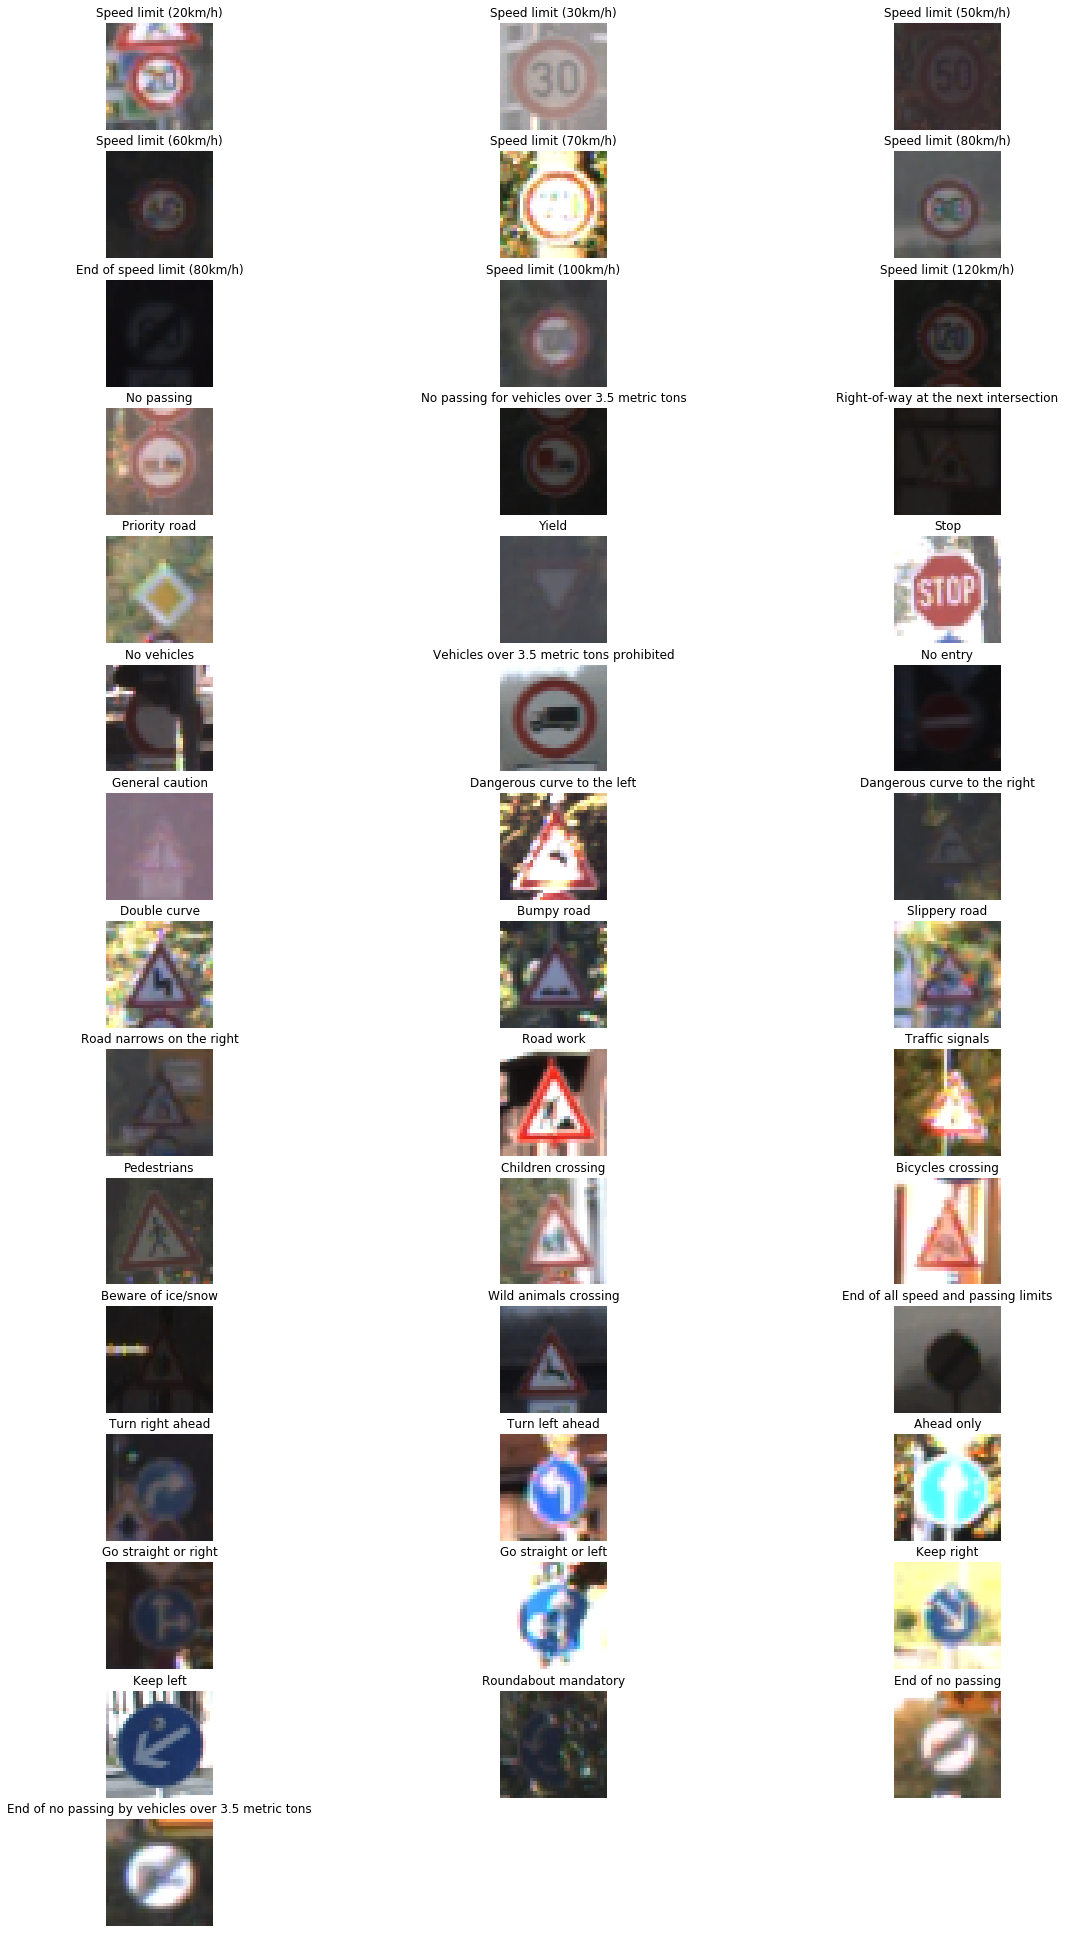

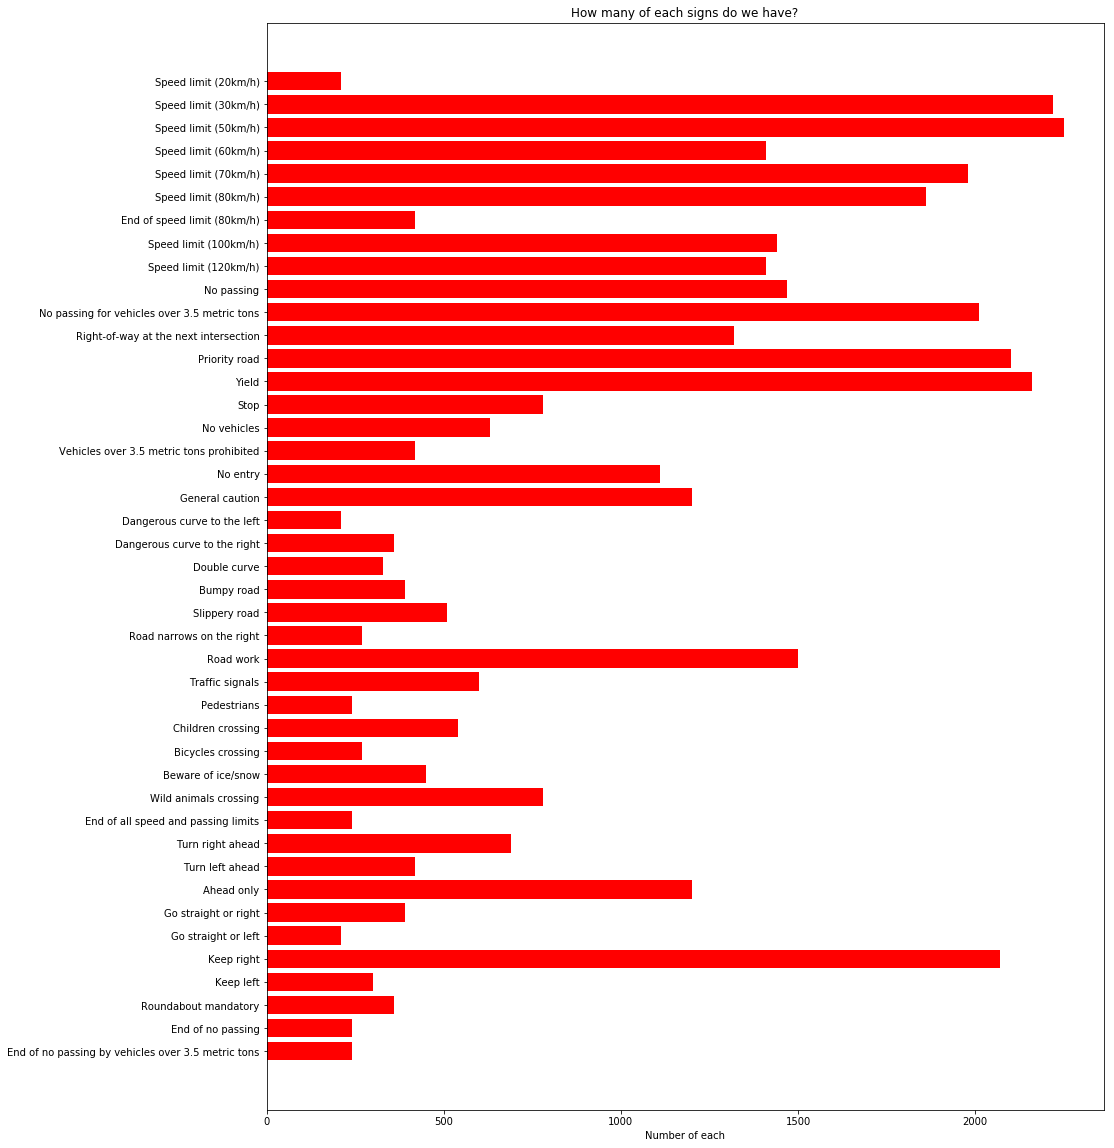

In [62]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import random
from itertools import groupby
%matplotlib inline

### Show images with it label.
num_of_samples=[]
plt.figure(figsize=(20, 35))
for i in range(0, n_classes):
    plt.subplot(15, 3, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(all_labels[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

### Show number of images per label
fig, ax = plt.subplots(figsize=(15, 20))

labels = np.arange(len(all_labels))
numOfEach = [len(list(group)) for key, group in groupby(y_train)]

ax.barh(labels, numOfEach, align='center', color='red')
ax.set_yticks(labels)
ax.set_yticklabels(all_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of each')
ax.set_title('How many of each signs do we have?')

plt.show()

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [0]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:
def normalize(data):
    return data / 255 * 0.8 + 0.1

X_train = normalize(X_train) 
X_test = normalize(X_test) 

## **Test GPU**
if print something like '/device:GPU:0', you are using GPU </br>
if print ' ' you are using CPU

In [8]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Model Architecture

In [0]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W' )
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution2')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(120), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84), name='fc2_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma), name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(43), name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 3))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 3))
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline

In [0]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#tf.reset_default_graph()   # To clear the defined variables and operations of the previous cell
saver = tf.train.Saver()

BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [84]:

EPOCHS = 30
l_accuracies = []
val_accuracies = []
loss_accuracies = []
train_accuracies = []
training_accuracies = []
validation_accuracies = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    
    num_examples = len(X_train)  
    n_baches = num_examples / BATCH_SIZE
    
    print("Training...\n")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        X_val, y_val = shuffle(X_validation, y_validation)
        loss = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss, _ = sess.run( [ loss_operation, training_operation ], feed_dict={x: batch_x, y: batch_y})
  
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_val, y_val)
        
        l_accuracies.append(loss)
        train_accuracies.append(training_accuracy)
        val_accuracies.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("num_examples: {}".format(num_examples))
        print("BATCH_SIZE: {}".format(BATCH_SIZE))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        
    loss_accuracies.append(l_accuracies)
    l_accuracies_array = np.array(loss_accuracies)
    np.save(base_dir +'train/loss_accuracies_all', l_accuracies_array)
    
    training_accuracies.append(train_accuracies)
    train_accuracies_array = np.array(training_accuracies)
    np.save(base_dir +'train/training_accuracies_all', train_accuracies_array)
    
    validation_accuracies.append(val_accuracies)
    val_accuracies_array = np.array(validation_accuracies)
    np.save(base_dir +'train/validation_accuracies_all', val_accuracies_array)

    saver.save(sess, base_dir + "train/lenet")
    print("Model saved")

Training...

EPOCH 1 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.724
Validation Accuracy = 0.701

EPOCH 2 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.869
Validation Accuracy = 0.848

EPOCH 3 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.927
Validation Accuracy = 0.905

EPOCH 4 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.952
Validation Accuracy = 0.925

EPOCH 5 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.958
Validation Accuracy = 0.932

EPOCH 6 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.968
Validation Accuracy = 0.944

EPOCH 7 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.978
Validation Accuracy = 0.958

EPOCH 8 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.980
Validation Accuracy = 0.954

EPOCH 9 ...
num_examples: 31367
BATCH_SIZE: 128
Training Accuracy = 0.980
Validation Accuracy = 0.959

EPOCH 10 ...
num_examples: 31367
BATCH_SIZE: 128
Training Ac

## Plot the training accuracies

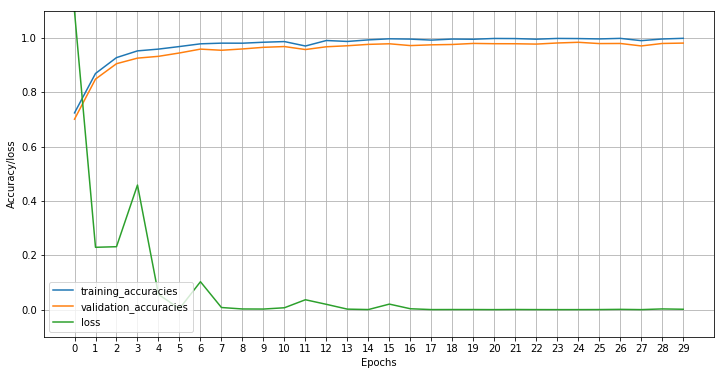

In [85]:
train_accs_array = np.load(base_dir +'train/training_accuracies_all.npy')
val_accs_array = np.load(base_dir +'train/validation_accuracies_all.npy')
l_accs_array = np.load(base_dir +'train/loss_accuracies_all.npy')


fig, ax = plt.subplots(figsize=(12,6))

for i, _ in enumerate(train_accs_array):
    ax.plot(range(0,len(train_accs_array[i])), train_accs_array[i], label='training_accuracies')
    ax.plot(range(0,len(val_accs_array[i])), val_accs_array[i], label='validation_accuracies')
    ax.plot(range(0,len(l_accs_array[i])), l_accs_array[i], label='loss')
    ax.set_xlabel('Epochs')
    ax.set_xticks(range(0,len(train_accs_array[i]),1))
    ax.set_ylabel('Accuracy/loss')
    ax.set_ylim([-0.1,1.1])
    ax.legend(loc=3)
    ax.grid(True)

plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

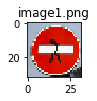

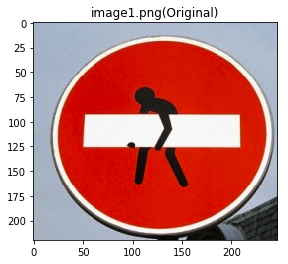

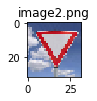

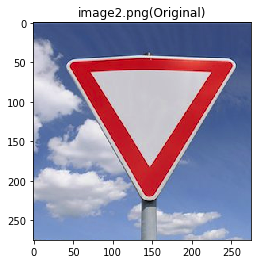

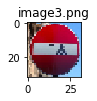

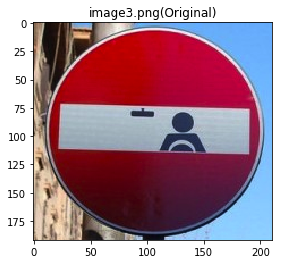

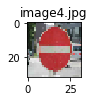

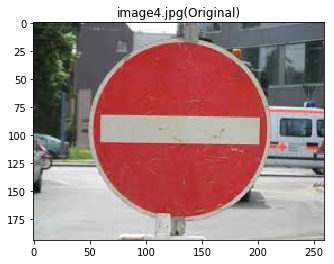

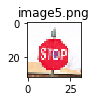

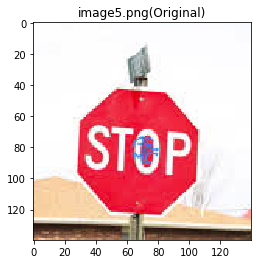

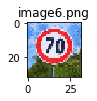

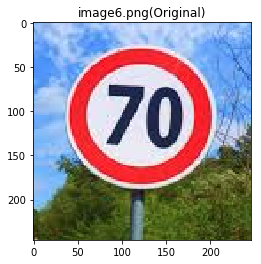

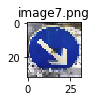

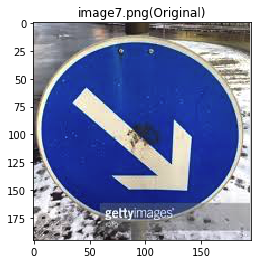

In [86]:
#importing some useful packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
%matplotlib inline

X_final_test = []
X_final_test_name = []

def pipeline(img):
    global X_final_test
    
    #Resize for consistency
    resize_image = cv2.resize(img, (32, 32))
    
    #Convert to 3 channels
    processed_img = cv2.cvtColor(resize_image, cv2.COLOR_BGRA2BGR) 
    
    X_final_test.append(processed_img)
    return resize_image

#printing out some stats and plotting
plt.close("all")
for file in sorted(os.listdir(base_dir + "test_images/")):
    plt.figure(figsize=(1,1))
    plt.title(file)
    plt.imshow(pipeline(mpimg.imread(base_dir + "test_images/" + file)))    
    plt.figure()
    plt.title(file + "(Original)")
    plt.imshow(mpimg.imread(base_dir + "test_images/" + file))
    X_final_test_name += [file]     
    
X_final_graph = X_final_test    

### Predict the Sign Type for Each Image

In [87]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(base_dir + "train"))  
    predicted_logits = sess.run(logits, feed_dict={x: X_final_test})
    
    predicted_labels = np.argmax(predicted_logits, axis=1)
    for i in range(len(X_final_test_name)):
        print("{0} - Prediction: {1}".format(X_final_test_name[i],all_labels[predicted_labels[i]]))

INFO:tensorflow:Restoring parameters from drive/Colab Notebooks/CarND-Traffic-Sign-Classifier-Project/train/lenet
image1.png - Prediction: No entry
image2.png - Prediction: Yield
image3.png - Prediction: No entry
image4.jpg - Prediction: No entry
image5.png - Prediction: Stop
image6.png - Prediction: Speed limit (20km/h)
image7.png - Prediction: Keep right


### Analyze Performance

In [88]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(base_dir + "train"))
    y_final_test = [17,13,17,17,14,4,38]
    test_accuracy = evaluate(X_final_test, y_final_test)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from drive/Colab Notebooks/CarND-Traffic-Sign-Classifier-Project/train/lenet
Test Accuracy = 86%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [89]:
with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for x in range(len(X_final_test_name)):
        print("{0}:".format(X_final_test_name[x]))
        for y in range(5):
            print("{:s}: {:.2f}%".format(all_labels[top5[1][x][y]], top5[0][x][y]*100))
        print()    

image1.png:
No entry: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%

image2.png:
Yield: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%

image3.png:
No entry: 100.00%
Yield: 0.00%
Bumpy road: 0.00%
Turn right ahead: 0.00%
Speed limit (30km/h): 0.00%

image4.jpg:
No entry: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%

image5.png:
Stop: 100.00%
Speed limit (80km/h): 0.00%
Bicycles crossing: 0.00%
Road work: 0.00%
Speed limit (70km/h): 0.00%

image6.png:
Speed limit (20km/h): 73.73%
Stop: 23.53%
Speed limit (30km/h): 2.69%
Speed limit (80km/h): 0.05%
Speed limit (70km/h): 0.00%

image7.png:
Keep right: 100.00%
Roundabout mandatory: 0.00%
General caution: 0.00%
No entry: 0.00%
Yield: 0.00%



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.